# Lab05 - Invatare automata - metode de evaluare

## Obiective

- intelegerea problemelor rezolvabile cu metode de învățare automată (regresie și clasificare). 
- intelegerea măsurilor de evaluare a performanței acestor metode.

## Cuvinte cheie
- regresie liniara (uni-variata si multi-variata)
- clasificare (binara si multi-class)
- eroare de predictie
- acuratete, precizie, rapel

## Aspecte teoretice 

- Regresie - scopul rezolvarii unei probleme de regresie este predictia unor valori reale. Calitatea predictiei (pe un set de date de control) consta in insumarea diferentelor (absolute sau ridicate la puterea a 2-a) dintre valoarea reala si valoarea prezisa de algoritm.

- Clasificare - scopul rezolvarii unei probleme de clasificare este predictia unor valori discrete (etichete). Calitatea predictiei (pe un set de date de control) consta in numararea diferentelor dintre valoarea (eticheta) reala si valoarea (Eticheta) prezisa de algoritm.

## Exemple (explicatii si demo)

### Regression problems


<details>
  <summary>Remember the theory behind error functions</summary>
  
In a regression problem, the outputs of a prediction algorithm are represented by real values. 
For instance, we want to estimate the icecream consumption (in a camp) according to the temperature and the number of children in a camp. This is a single-target regression problem (the target is icecream consumption) with two features (the temperature and the number of children).

Suppose that an ML algorithm has provided, for a set of camps (known as set of inputs or set of samples), a set of icecream consumption (known as set of outputs) $computedOutputs$. The real icecream consumption are also known ($realOutputs$). Determine the algorithm's performance.

A possible performance measure is given by the prediction error expressed as sum of the distances between the real outputs and the predicted outputs. The distance, for each sample, can be measured as:
- the absolute difference  (this is $L_1$ distance):
$$Error = \frac{1}{noSamples} \times \sum_{i=1}^{noSamples} |realNoInfections_i - computedNoInfections_i| = Mean Absolute Error (MAE)$$
- the square difference (this is the $L_2$ distance):
$$Error = \sqrt{\frac{1}{noSamples} \times \sum_{i=1}^{noSamples} (realNoInfections_i - computedNoInfections_i) ^ 2} = Root Mean Square Error (RMSE)$$ 


</details>


#### **Demo1**

Consider some real values and some predicted values (obtained by the ML algorithm) and we want ot estimate the error of prediction

| Country |	HappinessScore | PredictedScore |
| --- | --- | --- |
| Norway | 7.53 | 7.80 |
| Denmark | 7.52 | 7.75 |
| Iceland | 7.50 | 7.45 |
| Switzerland |	7.49 | 7.60 |
| Finland | 7.46 | 7.40 |

In [5]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

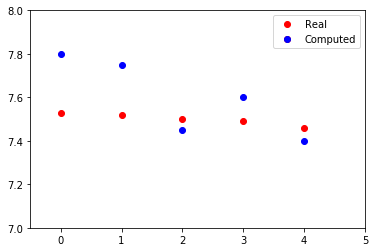

In [6]:
# Problem specification:
# input: realOutputs, computedOutputs - arrays of the same length containing real numbers
# output: error - real value

realOutputs = [7.53, 7.52, 7.5, 7.49, 7.46]
computedOutputs = [7.8, 7.75, 7.45, 7.6, 7.4]

# plot the data
indexes = [i for i in range(len(realOutputs))]
real, = plt.plot(indexes, realOutputs, 'ro', label = 'real')
computed, = plt.plot(indexes, computedOutputs, 'bo', label = 'computed')
plt.xlim(-0.5,5)
plt.ylim(7, 8)
plt.legend([real, (real, computed)], ["Real", "Computed"])
plt.show()


In [7]:

# compute the prediction error

# MAE
errorL1 = sum(abs(r - c) for r, c in zip(realOutputs, computedOutputs)) / len(realOutputs)
print('Error (L1): ', errorL1)

# RMSE
errorL2 = sqrt(sum((r - c) ** 2 for r, c in zip(realOutputs, computedOutputs)) / len(realOutputs))
print('Error (L2): ', errorL2)


Error (L1):  0.14399999999999977
Error (L2):  0.16970562748477128


### Binary classification problems 

<details>
  <summary>Remember the theory behind error functions</summary>
  

If we deal by a binary classification problem, the outputs represent some labels. There are possible two labels, only (one for each class or output type). Suppose that class 1 is the positive class, while class 2 is the negative class. For instance, if we want to classify the emails into spam or ham messages, *spam* and *ham* are the two classes. 

An ML algorithm has provided, for a set of emails (known as set of inputs or set of samples), a set of spam/ham labels (known as set of outputs) $computedOutputs$. The real labels are also known $realOutputs$. Determine the algorithm's performance. 

Three performance measures are usefull for a classification problem: accuracy, precision, recall. Some pre-computations, enclosed in the confusion matrix are useful: 
- true positive 
- false positive
- true negative
- false negative

The confusion matrix has the form: <img src="images/cm.png" width="400">
- accuracy represents the overall performance of classification model: 
$$acc = \frac{TP + TN}{TP + TN + FP + FN} = \frac{correc predicted}{no of all samples}$$
- precision indicates how accurate the positive predictions are: 
$$precision = \frac{TP}{TP+FP}$$
- recall indicates the coverage of actual positive sample: 
$$recall = \frac{TP}{TP+FN}$$

</details>


#### **Demo2.1**

Consider a set of emails, **half** of them being good ones (ham) and the others not (spam). We obtained the predicted labels by using an ML agorithm (obtained by the ML algorithm) and we want ot estimate the quality of prediction.

| email |	RealLabel | PredictedLabel |
| --- | --- | --- |
| FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv | spam | spam |
| Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030  | spam | ham |
| I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today   | ham | ham |
| I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times  | ham | spam |
| XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL  | spam | spam |
| I'm back &amp; we're packing the car now, I'll let you know if there's room | ham | ham |

In [ ]:
# packages required

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# consider some real labels and some predicted labels (obtained by the ML algorithm - a classifier)
# we want ot estimate the error of prediction (classification)

# Problem specification:
# input: realLabels, computedLabels - arrays of the same length containing binary labels (some discrete values)
# output: accuracy, precision, recall - real values in range [0,1]


# a balanced data set (each class containes the same numer of samples)

realLabels =        ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
computedLabels =    ['spam', 'ham', 'ham', 'spam', 'spam', 'ham']



# suppose that 'spam' is the positive class (and 'ham' is the negative class)
# compute the prediction performance

# version 1 - using the sklearn functions
def evalClassificationV1(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

    cm = confusion_matrix(realLabels, computedLabels, labels = labelNames)
    acc = accuracy_score(realLabels, computedLabels)
    precision = precision_score(realLabels, computedLabels, average = None, labels = labelNames)
    recall = recall_score(realLabels, computedLabels, average = None, labels = labelNames)
    return acc, precision, recall 

# version 2 - native code
def evalClassificationV2(realLabels, computedLabels, pos, neg):
    # noCorrect = 0
    # for i in range(0, len(realLabels)):
    #     if (realLabels[i] == computedLabels[i]):
    #         noCorrect += 1
    # acc = noCorrect / len(realLabels)
    acc = sum([1 if realLabels[i] == computedLabels[i] else 0 for i in range(0, len(realLabels))]) / len(realLabels)

    # TP = 0
    # for i in range(0, len(realLabels)):
    #     if (realLabels[i] == 'spam' and computedLabels[i] == 'spam'):
    #         TP += 1
    TP = sum([1 if (realLabels[i] == pos and computedLabels[i] == pos) else 0 for i in range(len(realLabels))])
    FP = sum([1 if (realLabels[i] == neg and computedLabels[i] == pos) else 0  for i in range(len(realLabels))])
    TN = sum([1 if (realLabels[i] == neg and computedLabels[i] == neg) else 0 for i in range(len(realLabels))])
    FN = sum([1 if (realLabels[i] == pos and computedLabels[i] == neg) else 0  for i in range(len(realLabels))])

    precisionPos = TP / (TP + FP)
    recallPos = TP / (TP + FN)
    precisionNeg = TN / (TN + FN)
    recallNeg = TN / (TN + FP)

    return acc, precisionPos, precisionNeg, recallPos, recallNeg
    
acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['spam', 'ham'])

# acc, prec, recall = evalClassificationV2(realLabels, computedLabels, 'spam', 'ham')

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)

acc:  0.6666666666666666  precision:  [0.66666667 0.66666667]  recall:  [0.66666667 0.66666667]


#### **Demo2.2**

Consider a set of persons and their tests against COVID. We have the PCR-test results (infected vs. normal) and those obtained by an ML algorithms. We want to estimate the quality of ML prediction.

**Note: just a few people were detected as infected by the PCR-test!!! Hppy us!** :smile:

| Person |	RealLabel | PredictedLabel |
| --- | --- | --- |
| person01 | infected | infected |
| person02 | infected | infected |
| person03 | infected | normal |
...

In [35]:
# consider some real labels and some predicted labels (obtained by the ML algorithm - a classifier)
# we want ot estimate the error of prediction (classification)

# Problem specification:
# input: realLabels, computedLabels - arrays of the same length containing binary labels (some discrete values)
# output: accuracy, precision, recall - real values in range [0,1]

# an unbalanced data set (the numer of samples from each class are not uniform distributed)

realLabels =        ['infected', 'infected', 'infected', 'infected', 'normal', 'normal', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'normal', 'normal', 'normal']
computedLabels =    ['infected', 'infected', 'normal', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'infected']

acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['infected', 'normal'])
# acc, prec, recall = evalClassificationV2(realLabels, computedLabels, 'infected', 'normal')

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)


acc:  0.8  precision:  [0.66666667 0.83333333]  recall:  [0.5        0.90909091]


### Binary classification and probabilities

<details>
  <summary>Remember the theory behind </summary>
 

What happens if the classification algorithm's **outputs represents probabilities** <img src="images/binClassProb.png" width="200">

In this case, for each sample, $noClasses$ probabilities are computed (such as the summ of probabilities for a sample is 1). Remember that in the case of a binary classification problems ($noClasses$ = 2)

$$computedOutputs = [(p_{11}, p_{12}), (p_{21}, p_{22}), ..., (p_{n1}, p_{n2})]$$

where $p_{ij}$ is the probability that the sample $i$ belongs to class $j$ and $n$ is the number of samples

The corresponding label is indicated by the largest probability

$$computedLabels = [argmax(p_{1j}), argmax(p_{2j}), ..., argmax(p_{nj}),$$ 

where $j \in \{1, 2, .., noClasses\}$

</details>


#### **Demo3**

Consider a set of emails, **half** of them being good ones (ham) and the others not (spam). We obtained the predicted outputs by using an ML agorithm and we want ot estimate the quality of prediction. The predicted outputs represent real values and not labels. In fact they are the probabilities associated to these labels. 


In [36]:
# consider some real labels and, instead of some predicted labels, we have some values (real values representing probabilities asscoaited to our labels) (obtained by the ML algorithm - a classifier)
# we want ot estimate the error of prediction (classification)
# reconsider the problem of emails' classification (spam vs ham)

# Problem specification:
# input: realLabels, computedOutputs - arrays of the same length containing labels (some discrete values) and real values, respectively
# output: accuracy, precision, recall - real values in range [0,1]


# if the rawOutputs of the ML algorithms are probabilities (not labels)
realLabels =        ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
computedOutputs = [ [0.7, 0.3], [0.2, 0.8], [0.4, 0.6], [0.9, 0.1], [0.7, 0.3], [0.4, 0.6]]
# computedLabels have to be  ['spam', 'ham', 'ham', 'spam', 'spam', 'ham']

# step1: transform the raw outputs into labels

# version 1 - native code
# computedLabels = []
# labelNames = list(set(realLabels))
# for p in computedOutputs:
#     probMaxPos = p.index(max(p))
#     label = labelNames[probMaxPos]
#     computedLabels.append(label)

# version 2 - by using NumPy library

labelNames = list(set(realLabels))
computedLabels = [labelNames[np.argmax(p)] for p in computedOutputs]

# step2: compute the performance
acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['spam', 'ham'])

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)


acc:  0.6666666666666666  precision:  [0.66666667 0.66666667]  recall:  [0.66666667 0.66666667]


## Temă


1. sa se determine eroarea de predictie în cazul unei regresii multi-target: pe baza unor date de intrare (precum numarul de ridicari, sarituri, etc.) se doreste predicatia greutatii, taliei si pulsului persoanei care a realizat exrcitiile. Un algoritm de ML a prezis aceste valori. Se doreste calcularea calitatii acestor predictii. A se consulta datele din fisierul "sport.csv". 

<details>
  <summary>Remember</summary>
  

> * Single-target regression: y = f(x1, x2, ..,xD) - a single real value is predicted based on D features (x1, x2, ..., xD) of an example
> * Multi-target regression: (y1,y2, ..., yk) = [f1(x1, x2, ..,xD), f2(x1, x2, ..,xD), ..., fk(x1, x2, ..,xD)] - more real values are predicted based on D features (x1, x2, ..., xD) of an example

> Problem specification:

> * input: realOutputss, computedOutputss - $k$-dimensional arrays of the same length containing real values (two matrix of $k \times noSamples$ elements, $k$ = number of output targets, $noSamples$ = no of samples/exampeles)

> * output: prediction error - real value

> Utilitate: <img src="images/objectDetection.png" width="250">

> * de exemplu in cazul unui detector de obiecte in imagini (de exemplu detectorul Yolo): fiind date imagini cu diferite animale, sa se identifice unde apare animalul in fiecare imagine. In acest caz, localizarea obiectului poate fi reprezentata printr-un chenar ($bounding$ $box$). Deci algoritmul va trebui sa prezica coordonatele a 2 colturi opuse ale chenarului sau coordonatele unui colt, lungimea si latimea chenarului. 

</details>



2. sa se determine acuratetea, precizia, rapelul în cazul unei clasificări multi-class: pe baza unor masuratori ale petalelor si sepalelor, se doreste predictia tipului de floare intr-un din clasele Daisy, Tulip, Rose. Se doreste calcularea calitatii acestor predictii. A se consulta datele din fisierul "flowers.csv". 

<details>
  <summary>Remember</summary>
  
> * Binary classification: y = f(x1, x2, ..,xD) - a single binary label (y) is predicted based on D features (x1, x2, ..., xD) of an example

> * Multi-class classification: y = f(x1, x2, ..,xD) - a single label (from a particular set of possible labels whose size > 2) is predicted based on D features (x1, x2, ..., xD) of an example

> Problem specification:

> * input: realLabels, computedLabels - one-dimensional arrays of the same length containing labels (two arrays of $noSamples$ labels from ${label_1, label_2, \ldots, label_C}$, $noSamples$ = no of samples/exampeles)

> * output: prediction quality expressed by accuracy, precison and recall.

> Utilitate: <img src="images/multiClass.png" width="100">

> * in clasificarea cifrelor scrise de mana avem 10 clase (cate o clasa pentru fiecare cifra), 
> * clasificarea tipurilor de obstacole in trafic (clasa pietonilor, clasa biciclistilor, clasa semnelor de circulatie, etc.)

</details>


## Temă opțională 




- sa se determine loss-ul (funcția de cost) în cazul problemelor de regresie 
- sa se determine loss-ul (funcția de cost) în cazul problemelor de clasificare binară cu output de tip probabilistic <img src="images/binClassProb.png" width="200">
    - outputul clasificatorului este reprezentat ca o matrice cu $noSamples \times 2$ valori reale subunitare; 
    - fiecare linie are suma elementelor 1, elementele reprezentand probabilitatile prezise pt fiecare din cele 2 clase).

